<a href="https://colab.research.google.com/github/vikpy/EconometricsSem3/blob/master/DS3_lec1_%26_lec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
%matplotlib inline
from matplotlib.pyplot import figure

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mydata_df = pd.read_csv("seasonal_trend.csv", header =0, names=['year', 'sales'], parse_dates =[0], index_col = 0)

In [ ]:
type(mydata_df)

pandas.core.frame.DataFrame

In [ ]:
mydata_df.sales

year
1         203
2         486
3         438
4         816
5         835
        ...  
171     67374
172     81184
173    117986
174     43674
175     49350
Name: sales, Length: 175, dtype: int64

In [ ]:
mydata_df1 = mydata_df['sales']

In [ ]:
mydata_df1.head()

year
1    203
2    486
3    438
4    816
5    835
Name: sales, dtype: int64

In [ ]:
mydatats = pd.Series(mydata_df['sales'].values, index=pd.date_range('11/01/2005', periods=175, freq='M'))

In [ ]:
mydatats

2005-11-30       203
2005-12-31       486
2006-01-31       438
2006-02-28       816
2006-03-31       835
               ...  
2020-01-31     67374
2020-02-29     81184
2020-03-31    117986
2020-04-30     43674
2020-05-31     49350
Freq: M, Length: 175, dtype: int64

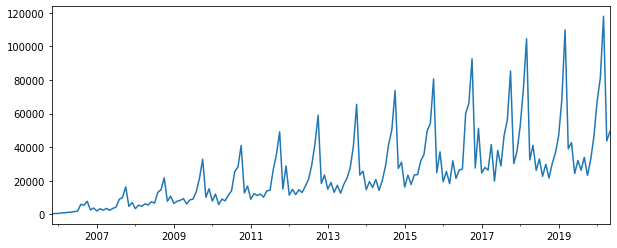

In [ ]:
plt.figure(figsize=(10,4))
mydatats.plot()


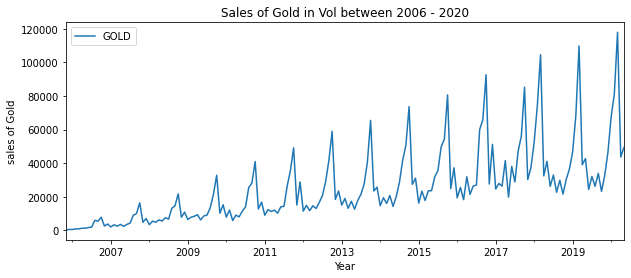

In [ ]:
plt.figure(figsize=(10,4))
mydatats.plot()
plt.title('Sales of Gold in Vol between 2006 - 2020')
plt.xlabel('Year')
plt.ylabel('sales of Gold')
plt.legend(['GOLD'])

In [ ]:
cumsum_mydatats = np.cumsum(mydatats)

In [ ]:
cumsum_mydatats.head(10)

2005-11-30      203
2005-12-31      689
2006-01-31     1127
2006-02-28     1943
2006-03-31     2778
2006-04-30     3960
2006-05-31     5178
2006-06-30     6786
2006-07-31     8667
2006-08-31    14557
Freq: M, dtype: int64

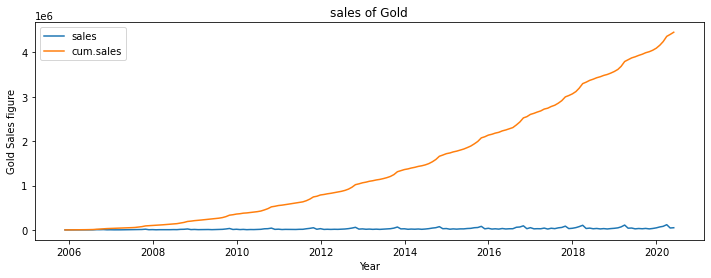

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(mydatats)
plt.plot(cumsum_mydatats)
plt.title('sales of Gold')
plt.xlabel('Year')
plt.ylabel('Gold Sales figure')
plt.legend(['sales', 'cum.sales'])

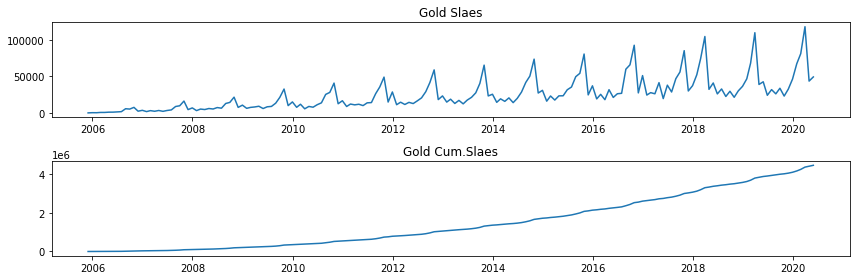

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(2, 1, 1)
plt.plot(mydatats)
plt.title('Gold Slaes')

plt.subplot(2, 1, 2)
plt.plot(cumsum_mydatats)
plt.title('Gold Cum.Slaes')
plt.tight_layout()


Simple Moving Average

In [ ]:
def plot_rolling(timeseries, window):
  rol_mean = timeseries.rolling(window).mean()
  rol_std = timeseries.rolling(window).std()

  fig = plt.figure(figsize=(12,6))
  og = plt.plot(timeseries, color = "blue", label = "original")
  mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
  std = plt.plot(rol_std, color = "black", label = "Rolling S.D")
  plt.legend(loc = "best")
  plt.title("Rolling Mean and S.D (window = " +str(window)+" )" )
  plt.show()


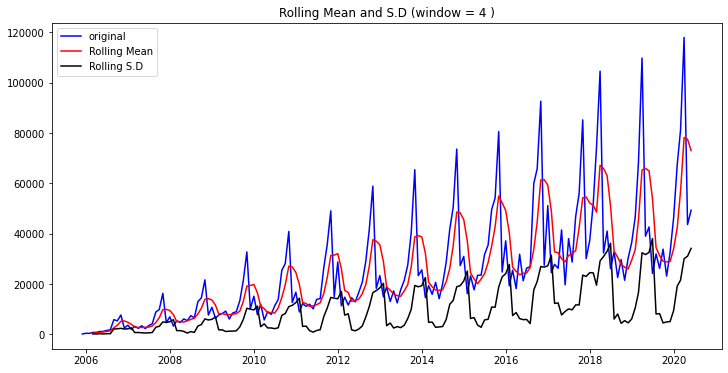

In [ ]:
plot_rolling(mydatats, 4)

In [ ]:
mydatats.rolling(5).std()

2005-11-30             NaN
2005-12-31             NaN
2006-01-31             NaN
2006-02-28             NaN
2006-03-31      268.734627
                  ...     
2020-01-31    17047.564949
2020-02-29    24022.562857
2020-03-31    33108.486483
2020-04-30    30312.514854
2020-05-31    29731.319258
Freq: M, Length: 175, dtype: float64

We can Avoid the initial NaN values

In [ ]:
def plot_rolling(timeseries, window):
  rol_mean = timeseries.rolling(window, min_periods = 1).mean()
  rol_std = timeseries.rolling(window, min_periods=1).std()

  fig = plt.figure(figsize=(12,6))
  og = plt.plot(timeseries, color = "blue", label = "original")
  mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
  std = plt.plot(rol_std, color = "black", label = "Rolling S.D")
  plt.legend(loc = "best")
  plt.title("Rolling Mean and S.D (window = " +str(window)+" )" )
  plt.show()

**Exponentially Weighted Moving Average(EWMA)**

In [ ]:
def plot_ewma(timeseries, alpha):
  exw_ma = timeseries.ewm(alpha = alpha).mean()

  fig = plt.figure(figsize=(12,6))
  org_line = plt.plot(timeseries, color ="blue", label ="orginal")
  exwma_line = plt.plot(exw_ma, color ="red", label = "EWMA")
  plt.legend(loc="best")
  plt.title("Expenentially Weighted Moving Avg (alpha = " +str(alpha)+" )" )
  plt.show()

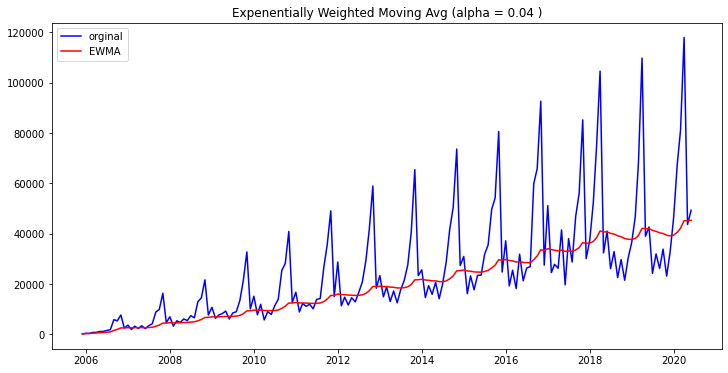

In [ ]:
plot_ewma(mydatats, 0.04)

Seasonal **Decompositation**

In [ ]:
pip install stldecompose

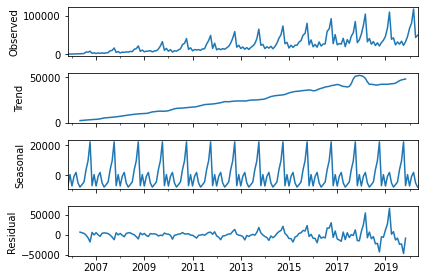

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom_mydatats = seasonal_decompose(mydatats)
decom_plot = decom_mydatats.plot()

In [ ]:
decom_mydatats = seasonal_decompose(mydatats)
decom_mydatats.seasonal

2005-11-30   -6849.873226
2005-12-31     480.942250
2006-01-31   -7069.266083
2006-02-28    -720.326980
2006-03-31    1937.022379
                 ...     
2020-01-31   -7069.266083
2020-02-29    -720.326980
2020-03-31    1937.022379
2020-04-30   -5054.250057
2020-05-31   -7781.944654
Freq: M, Length: 175, dtype: float64

In [ ]:
decom_mydatats.trend.head(20)

2005-11-30            NaN
2005-12-31            NaN
2006-01-31            NaN
2006-02-28            NaN
2006-03-31            NaN
2006-04-30            NaN
2006-05-31    2406.250000
2006-06-30    2637.750000
2006-07-31    2836.333333
2006-08-31    3003.250000
2006-09-30    3172.416667
2006-10-31    3334.416667
2006-11-30    3476.541667
2006-12-31    3602.000000
2007-01-31    3780.083333
2007-02-28    4006.083333
2007-03-31    4321.333333
2007-04-30    4869.333333
2007-05-31    5319.041667
2007-06-30    5547.166667
Freq: M, dtype: float64

In [ ]:
decom_mydatats.resid.head(20)

2005-11-30             NaN
2005-12-31             NaN
2006-01-31             NaN
2006-02-28             NaN
2006-03-31             NaN
2006-04-30             NaN
2006-05-31     6593.694654
2006-06-30     5126.772035
2006-07-31     3423.081559
2006-08-31     -881.716060
2006-09-30    -7404.957131
2006-10-31   -17774.043441
2006-11-30     5908.331559
2006-12-31     -372.942250
2007-01-31     5269.182750
2007-02-28       -5.756353
2007-03-31    -3827.355712
2007-04-30     3658.916724
2007-05-31     4799.902988
2007-06-30     4109.355369
Freq: M, dtype: float64

Note: Seasonal Decom gives us an additive model where value = trend + seasonal+resid


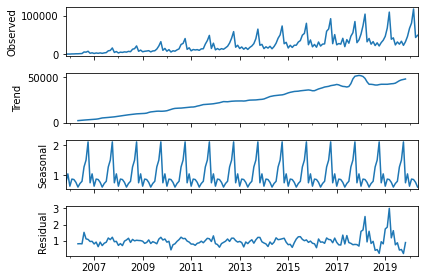

In [ ]:
decom_mydatats = seasonal_decompose(mydatats, model='multiplicative')
decom_plot = decom_mydatats.plot()

In [ ]:
from stldecompose import decompose

It can follow a "locally estimated scattererplot smoothing"

In [ ]:
mydatats_stl = decompose(mydatats, period= 12)
mydatats_stl.trend.head()

2005-11-30    1028.695456
2005-12-31    1243.224588
2006-01-31    1457.548521
2006-02-28    1671.665188
2006-03-31    1885.574194
Freq: M, dtype: float64

In [ ]:
mydatats_stl.resid.head()

2005-11-30    6279.765946
2005-12-31    -366.989035
2006-01-31    4592.352115
2006-02-28   -1613.569402
2006-03-31   -6483.143242
Freq: M, dtype: float64

<Figure size 864x432 with 0 Axes>

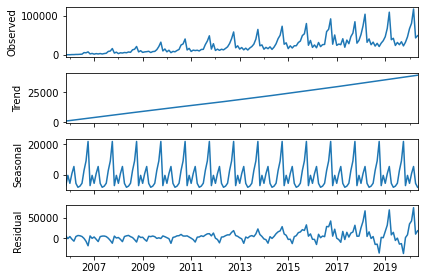

In [ ]:
plt.figure(figsize=(12,6))
stl_plot = mydatats_stl.plot()

Let's Substract the seasonality component from Mydatats

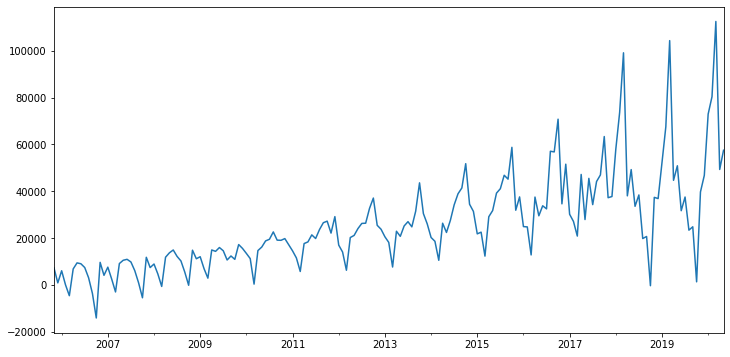

In [ ]:
mydatats_adj = mydatats - mydatats_stl.seasonal
plt.figure(figsize=(12,6))

mydatats_adj.plot()

Forecast

In [ ]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)
mydatats_stl = decompose(mydatats, period= 12)
mydatats_f = forecast(mydatats_stl, steps = 25, fc_func= mean, seasonal= True)
mydatats_f.head(10)

,mean+seasonal
2020-07-01,33251.014663
2020-08-01,39700.628406
2020-09-01,44401.925169
2020-10-02,33270.735949
2020-11-02,30749.040612
2020-12-03,31507.439846
2021-01-03,33395.619477
2021-02-03,41767.030028
2021-03-06,48011.469841
2021-04-06,60801.391396


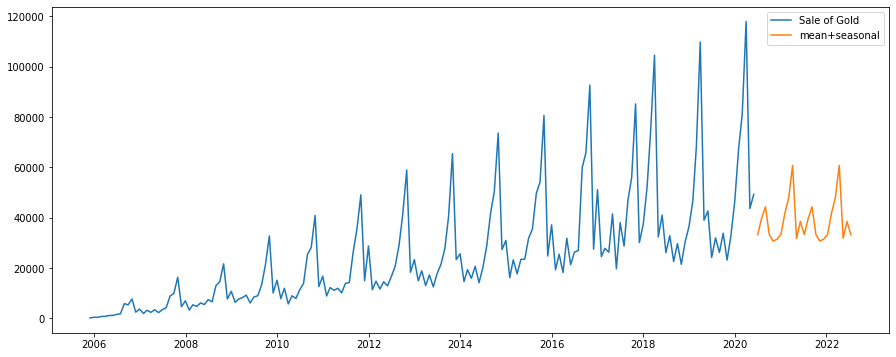

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(mydatats, label = 'Sale of Gold')
plt.plot(mydatats_f, label = mydatats_f.columns[0])
plt.legend()

Holt-Winter Exponential Smoothing

In [ ]:
from statsmodels.tsa. holtwinters import ExponentialSmoothing
mydatats_exp = ExponentialSmoothing(mydatats, seasonal= 'additive', seasonal_periods= 12)
mydatats_expfit = mydatats_exp.fit()
mydatats_expfit.params['smoothing_level']

0.03510020371267371

In [ ]:
mydatats_expfit.params['smoothing_seasonal']


0.9648997898694432

Alpha = 0.035 which indicates alpha is smooth as it is closer to 0.
Gama = 0.9, seasonal strength. 

In [ ]:
len(mydatats)

175

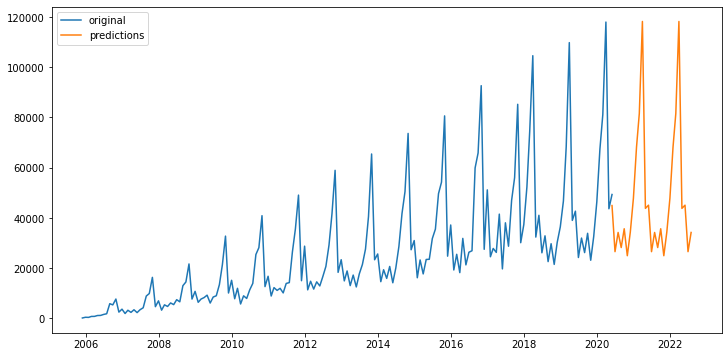

In [ ]:
mydatats_expfitf = mydatats_expfit.predict(start = 174, end = 200)
plt.figure(figsize=(12,6))
plt.plot(mydatats, label='original')
plt.plot(mydatats_expfitf, label='predictions')
plt.legend(loc='best')
plt.show()



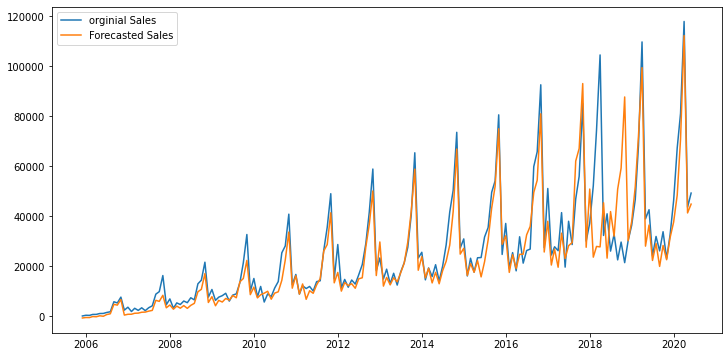

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(mydatats, label = 'orginial Sales')
plt.plot(mydatats_expfit.fittedvalues, label = 'Forecasted Sales')
plt.legend()